In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

data_path = "../data/sgdm_wbn"
image_path = "./images/sgdm_wbn"
os.makedirs(image_path,exist_ok=True)

2025-03-11 12:12:20.543753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-11 12:12:20.552495: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-11 12:12:20.555110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 12:12:21.005676: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
lr_fn = lambda js : js["optimizer"]["lr"]
p_fn = lambda js : js["norm"]["norm_multiply"]
wd_fn = lambda js : js["optimizer"]["lambda_wd"]
get_hyperparam_best_acc(data_path,
                        ["noreg","norm_p1","cnorm_p1","cnormu_p1","gcstdu_p1","norm","cnorm","cnormu","gcstdu","wd"],
                        [lr_fn,lr_fn,lr_fn,lr_fn,lr_fn,p_fn,p_fn,p_fn,p_fn,wd_fn])

Best of noreg is 0.025 & 85.91\%
Best of norm_p1 is 0.025 & 85.86\%
Best of cnorm_p1 is 0.025 & 86.17\%
Best of cnormu_p1 is 0.025 & 85.83\%
Best of gcstdu_p1 is 0.025 & 85.73\%
Best of norm is 0.15 & 86.08\%
Best of cnorm is 0.15 & 86.5\%
Best of cnormu is 0.15 & 85.61\%
Best of gcstdu is 0.15 & 86.15\%
Best of wd is 0.002 & 82.83\%


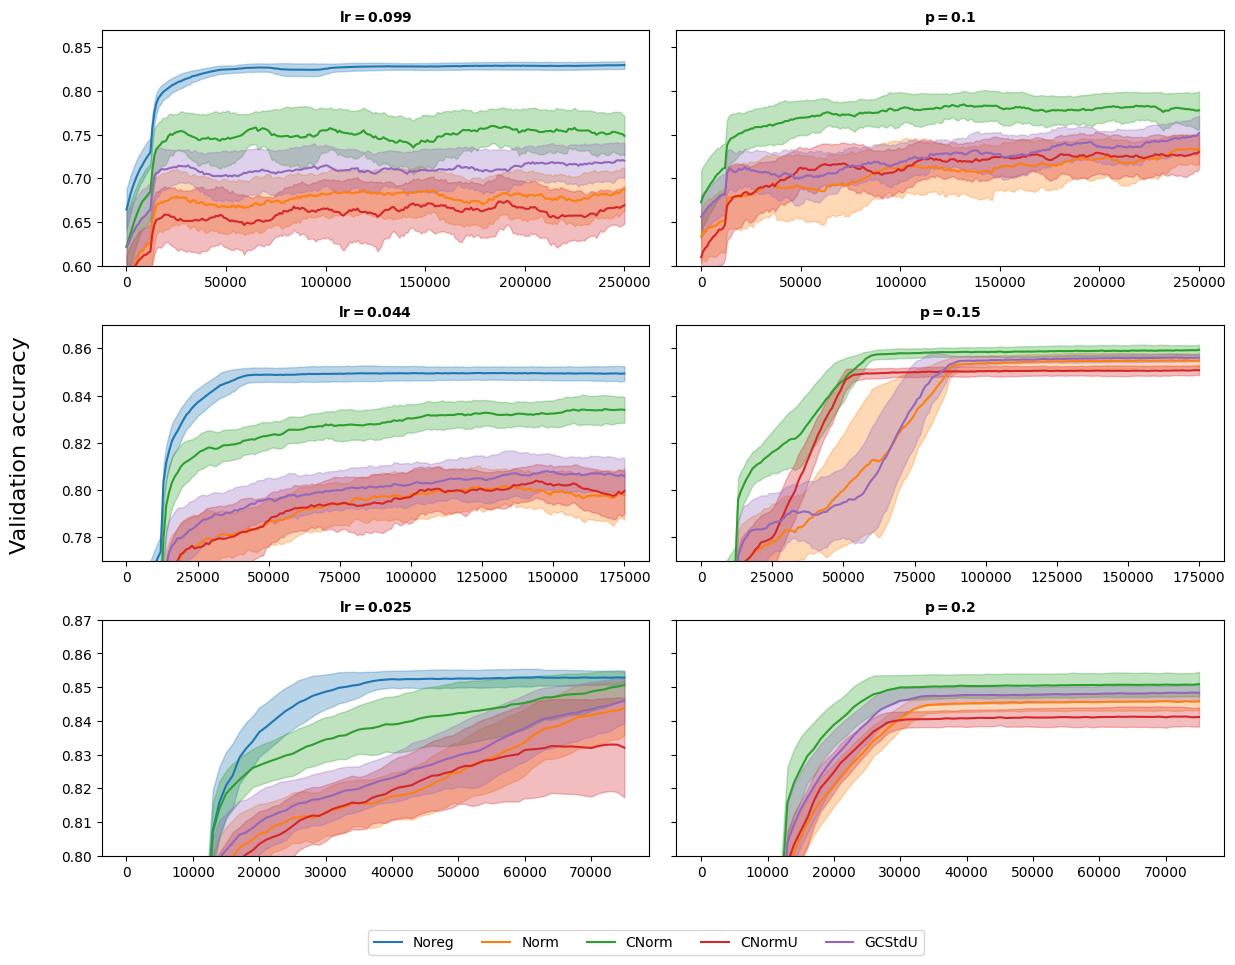

In [2]:
lrp = [("0.099","0.1"),("0.044","0.15"),("0.025","0.2")]

fig,axs = plt.subplots(ncols=2,nrows=len(lrp),sharey="row",sharex="row")

for i,((lr,p),max_step) in enumerate(zip(lrp,[250000,175000,75000])):
    
    for exp,lbl in zip(["noreg","norm_p1","cnorm_p1","cnormu_p1","gcstdu_p1"],["Noreg","Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{lr}","test_stats")
        if stats is not None:
            plot_step_stat(stats["acc"],axs[i][0],label=lbl,color=colors[lbl.lower()],smoothing=12,max_step=max_step)

    for exp,lbl in zip(["norm","cnorm","cnormu","gcstdu"],["Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{p}_1","test_stats")
        if stats is not None:
            plot_step_stat(stats["acc"],axs[i][1],label=lbl,color=colors[lbl.lower()],smoothing=12,max_step=max_step)
    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'normal'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)
axs[0][0].set_ylim(0.6,0.87)
axs[1][0].set_ylim(0.77,0.87)
axs[2][0].set_ylim(0.8,0.87)
fig.set_size_inches(12,9)
fig.tight_layout()
fig.savefig(f"{image_path}/lr_vs_p.png", bbox_inches='tight',dpi=1200)

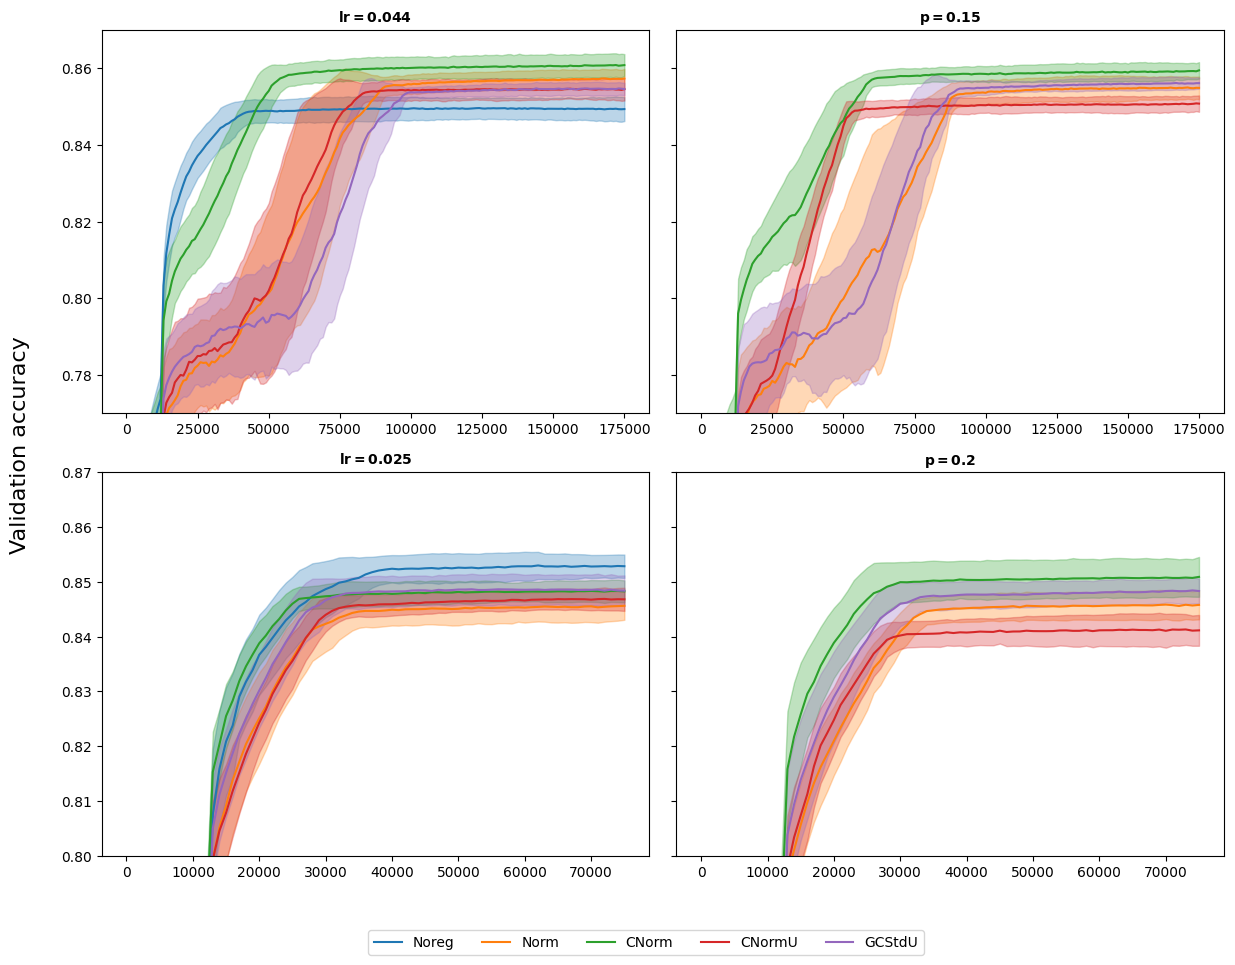

In [3]:
lrp = [("0.044","0.15"),("0.025","0.2")]

fig,axs = plt.subplots(ncols=2,nrows=len(lrp),sharey="row",sharex="row")

for i,((lr,p),max_step) in enumerate(zip(lrp,[250000,75000])):
    
    for exp,lbl in zip(["noreg","norm_p1_lrfix","cnorm_p1_lrfix","cnormu_p1_lrfix","gcstdu_p1_lrfix"],["Noreg","Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{lr}","test_stats")
        if stats is not None:
            plot_step_stat(stats["acc"],axs[i][0],label=lbl,color=colors[lbl.lower()],smoothing=12,max_step=max_step)

    for exp,lbl in zip(["norm","cnorm","cnormu","gcstdu"],["Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{p}_1","test_stats")
        if stats is not None:
            plot_step_stat(stats["acc"],axs[i][1],label=lbl,color=colors[lbl.lower()],smoothing=12,max_step=max_step)
    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'normal'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)
axs[0][0].set_ylim(0.77,0.87)
axs[1][0].set_ylim(0.8,0.87)
fig.set_size_inches(12,9)
fig.tight_layout()
fig.savefig(f"{image_path}/lr_vs_p_corrected.png", bbox_inches='tight',dpi=1200)

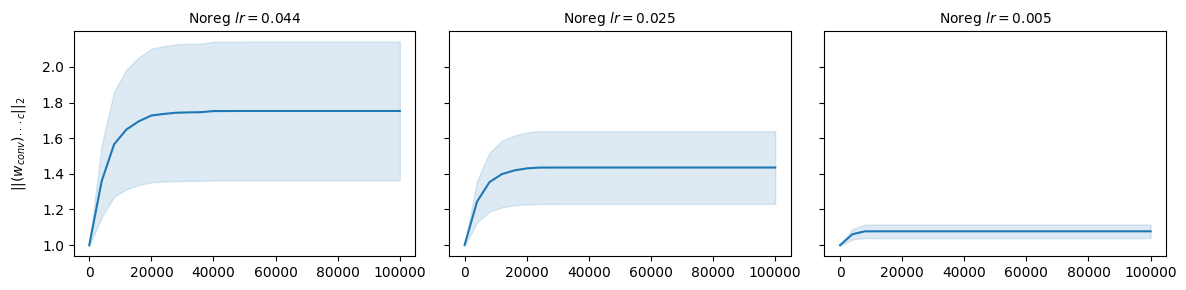

In [64]:
fig,axs = plot_mean_or_norm([f"{data_path}/noreg/0.044",f"{data_path}/noreg/0.025",f"{data_path}/noreg/0.005"],
                            [r"Noreg $lr=0.044$",r"Noreg $lr=0.025$",r"Noreg $lr=0.005$"],
                            [colors["noreg"],colors["noreg"],colors["noreg"]],
                            "mg_spacing_0",plot_mean=False,max_step=100000)
axs[0].set_ylabel(r"$||(w_{conv})_{\cdot \cdot \cdot c}||_2$",font={"weight":"bold"},labelpad=10)
fig.set_size_inches(12,3)
fig.tight_layout()

fig.savefig(f"{image_path}/noreg_norms.png", bbox_inches='tight',dpi=1200)

In [ ]:
fig,axs = distribution_drift(data_path,["noreg/0.025","norm_p1/0.15_1","cnorm/0.15_1","cnormu/0.15_1","gcstdu/0.15_1"],
                             [r"Noreg $lr=0.025$","Norm($lr=0.001$) $p=0.15$","CNorm($lr=0.001$) $p=0.15$","CNormU($lr=0.001$) $p=0.15$","GCStdU($lr=0.001$) $p=0.15$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]])

fig.set_size_inches(6,4)
fig.tight_layout()
fig.savefig(f"{image_path}/ics_lr.png", bbox_inches='tight',dpi=1200)

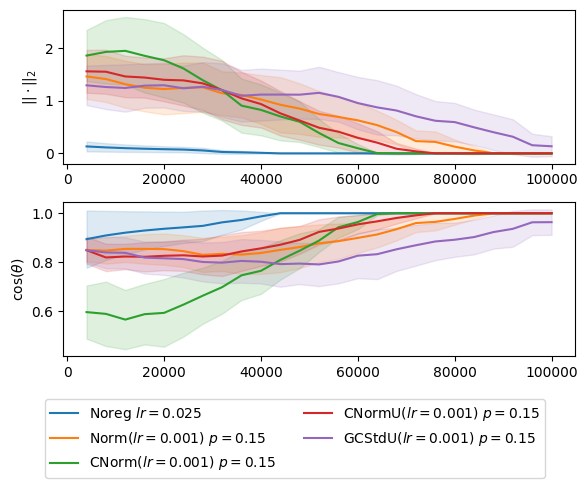

In [4]:
fig,axs = distribution_drift(data_path,["noreg/0.025","norm/0.15_1","cnorm/0.15_1","cnormu/0.15_1","gcstdu/0.15_1"],
                             [r"Noreg $lr=0.025$","Norm($lr=0.001$) $p=0.15$","CNorm($lr=0.001$) $p=0.15$","CNormU($lr=0.001$) $p=0.15$","GCStdU($lr=0.001$) $p=0.15$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]])

fig.set_size_inches(6,4)
fig.tight_layout()
fig.savefig(f"{image_path}/ics_p.png", bbox_inches='tight',dpi=1200)

/home/miri/Documents/bachelorthesis/plots/plot_utils.py:595: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_title("Cosine Similarity of Adam running average $\mu_{adam}$ and calculated $\mu_{calc}$",font={'weight' : 'normal'})
/home/miri/Documents/bachelorthesis/plots/plot_utils.py:628: SyntaxWarning: invalid escape sequence '\m'
  axs.set_title("Cosine Similarity of SgdM running average $\mu_{sgdm}$ and calculated $\mu_{calc}$",font={'weight' : 'normal'})


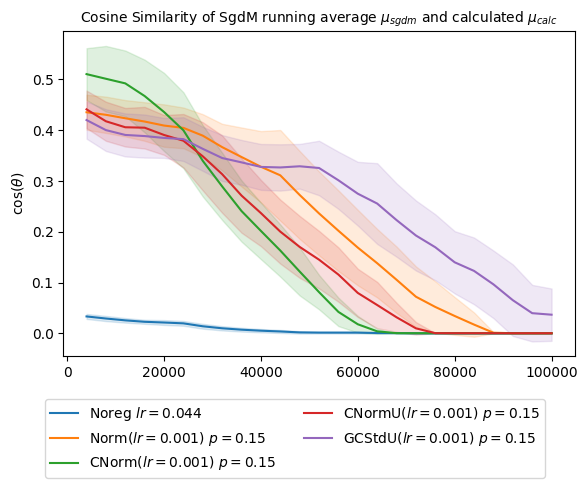

In [8]:
fig,axs = sgdm_drift(data_path,["noreg/0.044","norm/0.15_1","cnorm/0.15_1","cnormu/0.15_1","gcstdu/0.15_1"],
                             [r"Noreg $lr=0.044$","Norm($lr=0.001$) $p=0.15$","CNorm($lr=0.001$) $p=0.15$","CNormU($lr=0.001$) $p=0.15$","GCStdU($lr=0.001$) $p=0.15$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]])

fig.set_size_inches(6,4)
fig.tight_layout()


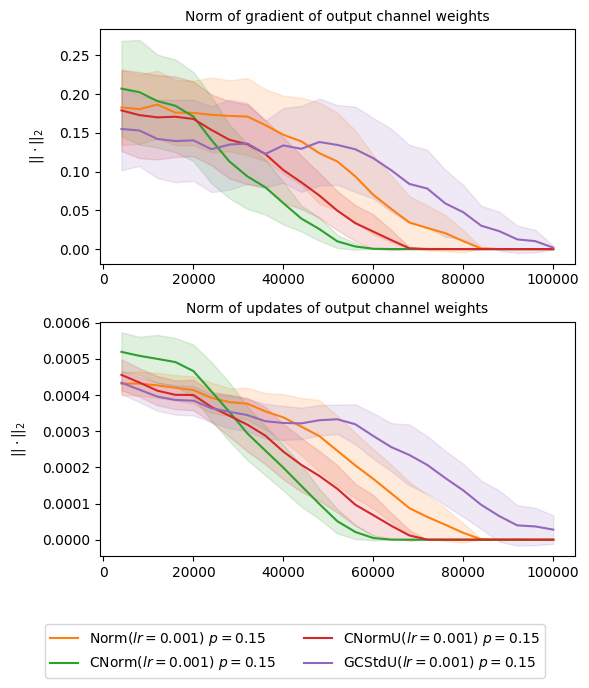

In [11]:

fig,axs = gradients_and_updates(data_path,["norm/0.15_1","cnorm/0.15_1","cnormu/0.15_1","gcstdu/0.15_1"],
                     ["Norm($lr=0.001$) $p=0.15$","CNorm($lr=0.001$) $p=0.15$","CNormU($lr=0.001$) $p=0.15$","GCStdU($lr=0.001$) $p=0.15$"],
                     [colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"]],"mg_spacing_0",layer="conv")

fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/grad_and_update_norm_p.png", bbox_inches='tight',dpi=1200)


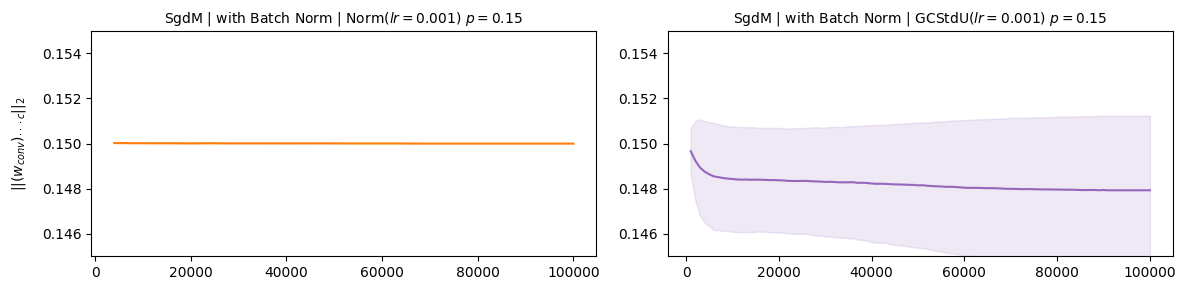

In [12]:
fig,axs = plot_mean_or_norm([f"{data_path}/norm/0.15_1",f"{data_path}/gcstdu/0.15_1"],
                            [r"SgdM | with Batch Norm | Norm($lr=0.001$) $p=0.15$",r"SgdM | with Batch Norm | GCStdU($lr=0.001$) $p=0.15$"],
                            [colors["norm"],colors["gcstdu"]],
                            "mg_spacing_0",False,max_step=100000)
axs[0].set_ylabel(r"$||(w_{conv})_{\cdot \cdot \cdot c}||_2$",font={"weight":"bold"},labelpad=10)
axs[0].set_ylim(0.145,0.155)
axs[1].set_ylim(0.145,0.155)
fig.set_size_inches(12,3)
fig.tight_layout()

fig.savefig(f"{image_path}/norm_vs_gcstdu_output_channel_norm.png", bbox_inches='tight',dpi=1200)

In [36]:
#fig,axs = plot_mean_or_norm([f"{data_path}/noreg/0.025",f"{data_path}/norm/0.15_1"],
#                            [r"SgdM | with Batch Norm | Norm($lr=0.001$) $p=0.15$",r"SgdM | with Batch Norm | GCStdU($lr=0.001$) $p=0.15$"],
#                            [colors["norm"],colors["gcstdu"]],
#                            "mg_spacing_0",load_idx=0,plot_mean=True,max_step=100000,layer="batchnorm",attr="bias",measure_global=False)
#axs[0].set_ylabel(r"$||(w_{conv})_{\cdot \cdot \cdot c}||_2$",font={"weight":"bold"},labelpad=10)
#fig.set_size_inches(12,3)
#fig.tight_layout()

#fig.savefig(f"{image_path}/norm_vs_gcstdu_output_channel_norm.png", bbox_inches='tight',dpi=1200)

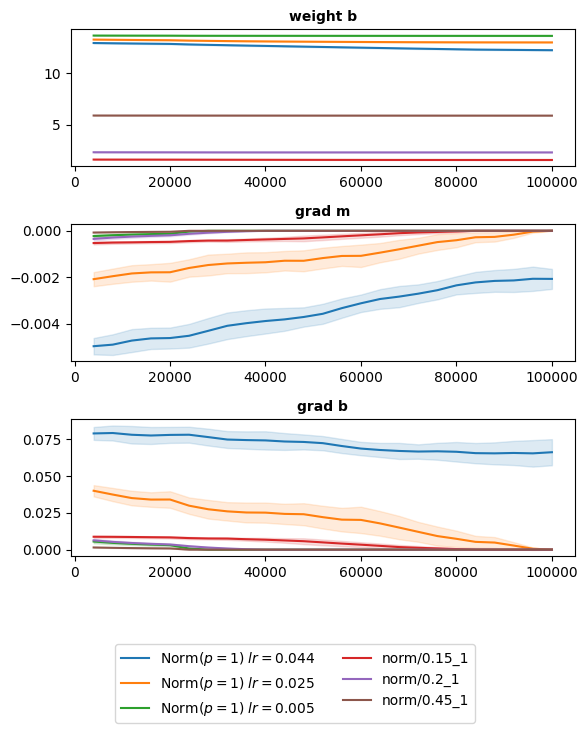

In [14]:
exps = ["norm_p1/0.044","norm_p1/0.025","norm_p1/0.005","norm/0.15_1","norm/0.2_1","norm/0.45_1"]
labels = [r"Norm($p=1$) $lr = 0.044$", r"Norm($p=1$) $lr = 0.025$", r"Norm($p=1$) $lr = 0.005$","norm/0.15_1","norm/0.2_1","norm/0.45_1"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))
fig,axs = mg_spacing(data_path,exps,labels,colors,"mg_spacing_0")

fig.set_size_inches(6,6)
fig.tight_layout()
